# **ACTIVIDAD SEMANA 4**
# Ciencia y Analítica de Datos

# Equipo 170 

Freddy Armendariz Herrera - A01793672

Samuel Elías Flores González - A01793668

**Profesor**

Juan Miguel Meza Méndez

Fecha: 3 de Octubre del 2022

Abrimos y leemos el archivo con la base de datos

In [108]:
import pandas as pd                      #Importamos librerias
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt

In [109]:
inPath = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'  #Definimos la ruta del archivo

In [110]:
df_credit = pd.read_csv(inPath)         #Leemos el contenido del archivo y lo almacenamos en un dataframe
df = df_credit.copy()                   #Creamos copia del dataframe

Renombramos las columnas para identificar fácilmente las variables categóricas

In [111]:
df = df.rename(columns = {'X1' : 'Amount_Credit', 
                          'X2' : 'Gender',
                          'X3' : 'Education',
                          'X4' : 'Marital_Status',
                          'X5' : 'Age',
                          'X6' : 'Payment_Sep_2005',
                          'X7' : 'Payment_Aug_2005',
                          'X8' : 'Payment_Jul_2005',
                          'X9' : 'Payment_Jun_2005',
                          'X10' : 'Payment_May_2005',
                          'X11' : 'Payment_Apr_2005',
                          'X12' : 'Bill_State_Sep_2005',
                          'X13' : 'Bill_State_Aug_2005',
                          'X14' : 'Bill_State_Jul_2005',
                          'X15' : 'Bill_State_Jun_2005',
                          'X16' : 'Bill_State_May_2005',
                          'X17' : 'Bill_State_Apr_2005',
                          'X18' : 'Previous_Pay_Sep_2005',
                          'X19' : 'Previous_Pay_Aug_2005',
                          'X20' : 'Previous_Pay_Jul_2005',
                          'X21' : 'Previous_Pay_Jun_2005',
                          'X22' : 'Previous_Pay_May_2005',
                          'X23' : 'Previous_Pay_Apr_2005' }, 
               inplace = False
               )

Ahora intentamos definir cuales son las variables categóricas usando df.info(), sin embargo al ejecutarlo, observamos que todos los datos son de tipo entero y flotante. 

Para saber cuales son categóricas nos valdremos de la descripción de la base de datos.

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     30000 non-null  int64  
 1   Amount_Credit          30000 non-null  int64  
 2   Gender                 29999 non-null  float64
 3   Education              29998 non-null  float64
 4   Marital_Status         29998 non-null  float64
 5   Age                    29995 non-null  float64
 6   Payment_Sep_2005       29997 non-null  float64
 7   Payment_Aug_2005       29995 non-null  float64
 8   Payment_Jul_2005       29993 non-null  float64
 9   Payment_Jun_2005       29991 non-null  float64
 10  Payment_May_2005       29984 non-null  float64
 11  Payment_Apr_2005       29986 non-null  float64
 12  Bill_State_Sep_2005    29989 non-null  float64
 13  Bill_State_Aug_2005    29989 non-null  float64
 14  Bill_State_Jul_2005    29987 non-null  float64
 15  Bi

Después de leer y analizar las descripciones, determinamos que las siguientes columnas son categoricas:

Gender, Education, Marital status, Age, Payment september - April 2005

ya que sabemos cuales son las variables categóricas, procedemos a eliminar las variables categóricas, puesto que solo nos interesan las numéricas


In [113]:
df = df.drop(['ID', 'Gender', 'Education', 'Marital_Status', 'Age', 'Payment_Sep_2005', 'Payment_Aug_2005', 'Payment_Jul_2005', 'Payment_Jun_2005', 'Payment_May_2005', 'Payment_Apr_2005', 'Y'], axis =1 )

In [114]:
df                 #Dataframe resultante solo con variables numericas

,Amount_Credit,Bill_State_Sep_2005,Bill_State_Aug_2005,Bill_State_Jul_2005,Bill_State_Jun_2005,Bill_State_May_2005,Bill_State_Apr_2005,Previous_Pay_Sep_2005,Previous_Pay_Aug_2005,Previous_Pay_Jul_2005,Previous_Pay_Jun_2005,Previous_Pay_May_2005,Previous_Pay_Apr_2005
0,20000,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


Verificamos la existencia de datos nulos en el dataframe y los eliminamos


In [115]:
df.isna().values.any()     #True = Si hay valores nulos 

True

In [116]:
df.dropna(inplace = True)  #Eliminamos los datos NaN
df.isna().values.any()     #False = No hay datos nulos

False

In [117]:
df                 #Dataframe resultante sin datos vacios o nulos

,Amount_Credit,Bill_State_Sep_2005,Bill_State_Aug_2005,Bill_State_Jul_2005,Bill_State_Jun_2005,Bill_State_May_2005,Bill_State_Apr_2005,Previous_Pay_Sep_2005,Previous_Pay_Aug_2005,Previous_Pay_Jul_2005,Previous_Pay_Jun_2005,Previous_Pay_May_2005,Previous_Pay_Apr_2005
0,20000,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


Vemos que los datos que se eliminaron fueron solo 26 lo que representan el 0.08% de los datos.

Así que esto no nos debería afectarnos

In [118]:
df.shape    #Mostramos el tamaño del dataframe

(29974, 13)

Procedemos a mostrar la correlacion del dataframe resultante

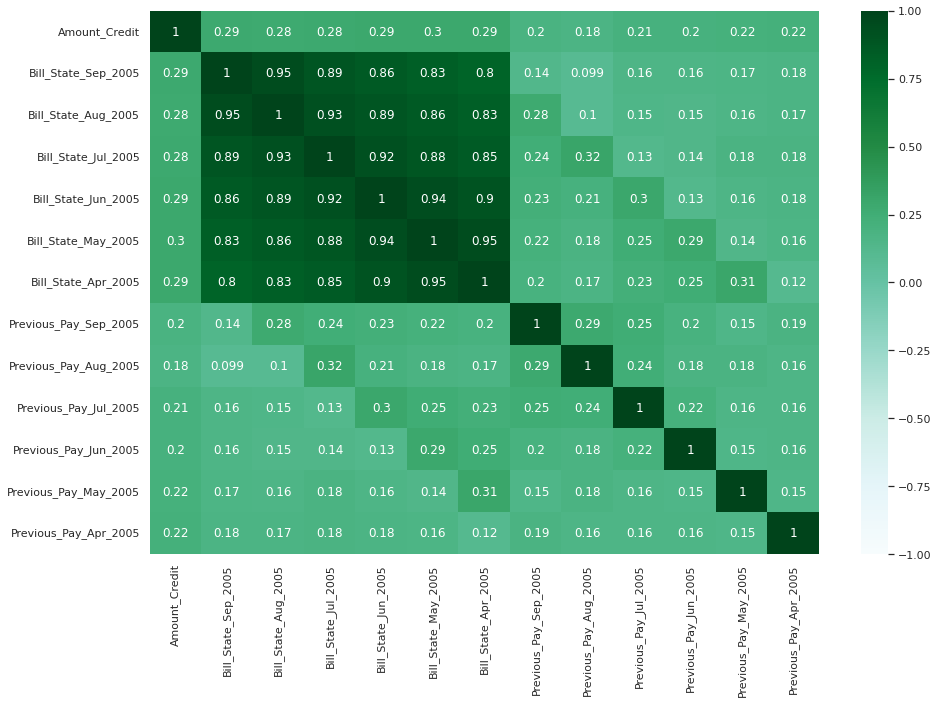

In [119]:
df.corr()


corrs = df.corr()
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "BuGn", annot= True)

# **Normalización y PCA**

Ahora escogemos 2 variables con alta correlación como lo son:

Bill_State_Sep_2005 y Bill_State_Aug_2005


para mostrar sus varianzas

In [120]:
ndf = df[['Bill_State_Sep_2005', 'Bill_State_Aug_2005']]
ndf.corr()

,Bill_State_Sep_2005,Bill_State_Aug_2005
Bill_State_Sep_2005,1.00000,0.95149
Bill_State_Aug_2005,0.95149,1.00000


In [121]:
df.Bill_State_Aug_2005.mean().round(2)

49202.81

In [122]:
df.Bill_State_Sep_2005.mean().round(2)

51246.91

In [123]:
Varience = np.cov([df.Bill_State_Aug_2005, df.Bill_State_Sep_2005])
Varience

array([[5.06910390e+09, 4.99000182e+09],
       [4.99000182e+09, 5.42577907e+09]])

In [124]:
varBillAug =Varience[0][0]
varBillSep = Varience[1][1]
t= ndf.var().sum()

In [125]:
print('Total Varience \t\t\t:', t.round(2) )
print('Varience prop. of Bill State Aug 2005 \t:', ((varBillAug/t)*100).round(2),'%' )
print('Varience prop. of Bill State Sep 2005 \t:', ((varBillSep/t)*100).round(2),'%' )

Total Varience 			: 10494882969.67
Varience prop. of Bill State Aug 2005 	: 48.3 %
Varience prop. of Bill State Sep 2005 	: 51.7 %


Podemos observar que el rango de valores de la cantidad de Bill State Aug 2005 (48.3%) es menor que la de Bill State Sep 2005 (51.7%), esto no significa que el segundo dato sea mas relevante.

Ahora que sabemos que las varianzas deben igualarse (escalarse).

Escalamos los datos para realizar correctamente el PCA

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df.head()



,Amount_Credit,Bill_State_Sep_2005,Bill_State_Aug_2005,Bill_State_Jul_2005,Bill_State_Jun_2005,Bill_State_May_2005,Bill_State_Apr_2005,Previous_Pay_Sep_2005,Previous_Pay_Aug_2005,Previous_Pay_Jul_2005,Previous_Pay_Jun_2005,Previous_Pay_May_2005,Previous_Pay_Apr_2005
0,-1.137194,-0.642612,-0.647516,-0.668120,-0.672608,-0.663199,-0.652862,-0.341936,-0.227162,-0.296823,-0.308114,-0.314169,-0.293481
1,-0.366429,-0.659324,-0.666856,-0.639390,-0.621763,-0.606388,-0.598122,-0.341936,-0.213670,-0.240047,-0.244307,-0.314169,-0.181023
2,-0.597658,-0.298782,-0.494067,-0.482596,-0.449915,-0.417407,-0.391853,-0.250316,-0.191978,-0.240047,-0.244307,-0.248741,-0.012335
3,-0.905965,-0.057792,-0.013622,0.032490,-0.232629,-0.187023,-0.156879,-0.221225,-0.169461,-0.228692,-0.237926,-0.244226,-0.237252
4,-0.905965,-0.578749,-0.611446,-0.161482,-0.347216,-0.348379,-0.331725,-0.221225,1.334309,0.270936,0.266151,-0.269089,-0.255301


In [127]:
df_copy = scaled_df.copy()

cols= ['Bill_State_Sep_2005', 'Bill_State_Aug_2005']  #Determinamos las columnas de interes


summary= {"Varianza": df_copy[cols].var()[0:3],    #Imprimimos valores estadisticos
         "Valor Min": df_copy[cols].min()[0:3], 
         "Valor Max": df_copy[cols].max()[0:3]
} 

pd.DataFrame(summary, index=cols).transpose() #Aplicamos transposicion

,Bill_State_Sep_2005,Bill_State_Aug_2005
Varianza,1.000033,1.000033
Valor Min,-2.943672,-1.671148
Valor Max,12.398598,13.128859


In [128]:
ndf = df[['Bill_State_Sep_2005', 'Bill_State_Aug_2005']]
ndf.corr()

,Bill_State_Sep_2005,Bill_State_Aug_2005
Bill_State_Sep_2005,1.00000,0.95149
Bill_State_Aug_2005,0.95149,1.00000


# **Aplicamos PCA**

Ya que tenemos nuestros datos limpios y escalados, podemos proceder con PCA

In [129]:
pcs = PCA()                 #Aplicamos PCA
pcs_t = pcs.fit_transform(scaled_df)
pcs_t


array([[-1.91845082e+00, -4.47427816e-01,  3.72834682e-01, ...,
        -4.68222452e-03,  8.35238023e-03,  1.10229377e-02],
       [-1.70287565e+00, -1.47896759e-01,  5.26159292e-02, ...,
         1.09039897e-02, -3.90155482e-03,  1.78346830e-03],
       [-1.21987458e+00, -2.74742537e-01,  8.94492873e-02, ...,
        -8.05980575e-02, -4.13245461e-02, -5.70550179e-02],
       ...,
       [-1.29095650e+00,  1.39178791e-01,  5.43971037e-01, ...,
         3.51558840e-02,  1.28788803e-02, -1.24710948e-02],
       [ 8.11385979e-01,  2.39953617e+00,  5.31347998e-01, ...,
         1.71849319e-01, -1.40480795e-01, -8.91696233e-03],
       [-5.54537090e-01, -6.80734728e-01,  3.83720867e-01, ...,
        -1.59085563e-02,  1.15150442e-01, -4.84060476e-02]])

In [130]:
 pcsSummary_df = pd.DataFrame({ '% varianza Explicada': np.round(pcs.explained_variance_ratio_,4) * 100,
                                '% varianza Acumulada': np.cumsum(pcs.explained_variance_ratio_) * 100                              
                              }) 
pcsSummary_df


,% varianza Explicada,% varianza Acumulada
0,45.49,45.490116
1,13.17,58.663141
2,7.25,65.909112
3,6.80,72.708324
4,6.72,79.427722
5,6.02,85.445173
6,5.70,91.142604
7,5.59,96.729579
8,2.03,98.764139
9,0.55,99.310418


In [131]:
pcs_labels = [f'PC{i + 1}' for i in range(len(scaled_df.columns))]
pcsSummary_df.index = pcs_labels
pcsSummary_df


,% varianza Explicada,% varianza Acumulada
PC1,45.49,45.490116
PC2,13.17,58.663141
PC3,7.25,65.909112
PC4,6.80,72.708324
PC5,6.72,79.427722
PC6,6.02,85.445173
PC7,5.70,91.142604
PC8,5.59,96.729579
PC9,2.03,98.764139
PC10,0.55,99.310418


In [132]:
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
% varianza Explicada,45.4900,13.1700,7.2500,6.8000,6.7200,6.0200,5.7000,5.5900,2.0300,0.5500,0.3200,0.1900,0.18
% varianza Acumulada,45.4901,58.6631,65.9091,72.7083,79.4277,85.4452,91.1426,96.7296,98.7641,99.3104,99.6263,99.8212,100.00


In [133]:
pcs_df = pd.DataFrame(pcs_t, columns = pcs_labels)

print("Varianza total variables originales:", scaled_df.var().sum())
print("Varianza total de los componentes:", pcs_df.var().sum())

Varianza total variables originales: 13.00043372368465
Varianza total de los componentes: 13.000433723684635


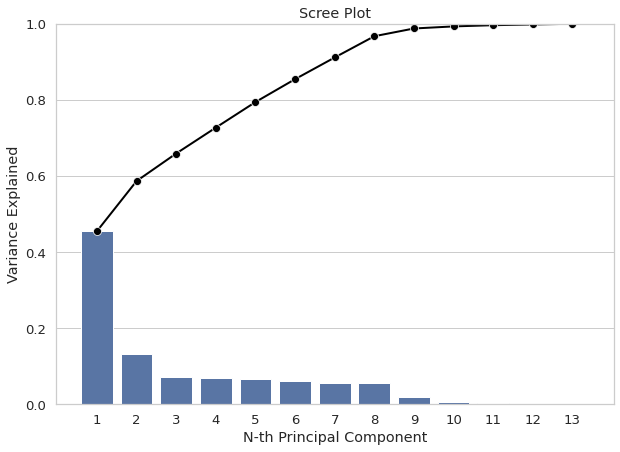

In [134]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [135]:
pcs.components_.round(4) 

array([[ 1.648e-01,  3.727e-01,  3.835e-01,  3.885e-01,  3.918e-01,
         3.888e-01,  3.810e-01,  1.352e-01,  1.168e-01,  1.281e-01,
         1.169e-01,  1.138e-01,  1.055e-01],
       [ 2.941e-01, -1.908e-01, -1.741e-01, -1.259e-01, -1.192e-01,
        -1.046e-01, -9.280e-02,  3.861e-01,  4.115e-01,  3.947e-01,
         3.519e-01,  3.056e-01,  3.252e-01],
       [-3.931e-01, -7.450e-02,  3.500e-03,  7.240e-02,  8.080e-02,
         5.070e-02, -4.460e-02,  3.935e-01,  4.110e-01,  2.656e-01,
        -5.240e-02, -5.337e-01, -3.764e-01],
       [ 5.020e-02,  4.050e-02,  8.420e-02,  1.115e-01,  3.090e-02,
        -1.024e-01, -1.721e-01,  2.364e-01,  1.447e-01, -2.241e-01,
        -5.684e-01, -2.470e-01,  6.513e-01],
       [-1.037e-01, -3.880e-02, -2.530e-02,  1.018e-01,  1.130e-02,
        -1.034e-01,  6.980e-02,  3.270e-02,  3.979e-01, -1.340e-01,
        -5.049e-01,  6.393e-01, -3.465e-01],
       [ 2.557e-01,  3.200e-03, -3.310e-02, -1.156e-01,  1.221e-01,
        -1.400e-02, -5.000e

In [139]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcs_df.columns,
                                index=df.columns
                                )
pcsComponents_df.iloc[:, :5]

,PC1,PC2,PC3,PC4,PC5
Amount_Credit,0.164797,0.294112,-0.393084,0.050175,-0.103697
Bill_State_Sep_2005,0.372671,-0.190750,-0.074463,0.040539,-0.038815
Bill_State_Aug_2005,0.383515,-0.174102,0.003523,0.084170,-0.025290
Bill_State_Jul_2005,0.388535,-0.125858,0.072443,0.111451,0.101761
Bill_State_Jun_2005,0.391847,-0.119230,0.080821,0.030852,0.011276
Bill_State_May_2005,0.388801,-0.104601,0.050723,-0.102352,-0.103418
Bill_State_Apr_2005,0.380960,-0.092842,-0.044644,-0.172057,0.069835
Previous_Pay_Sep_2005,0.135177,0.386136,0.393515,0.236365,0.032729
Previous_Pay_Aug_2005,0.116801,0.411454,0.411007,0.144705,0.397852
Previous_Pay_Jul_2005,0.128074,0.394666,0.265639,-0.224095,-0.133951
